In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import scipy

In [2]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/'
protein="TNR" #TNR,Agg,WFA,HABP

In [3]:
results = {"filename":[],
          "exp condition":[],
          "ecmchannelno":[],
          "synapsechannelno":[],
           "Manual vglut spots mask":[]
          }
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if "_analyse" in str(filelist[i]):
        #print(1)
        if "2019" in str(filelist[i]):
            #print(2)
            if ("Pop" in str(filelist[i]))==False:
                #print(3)
                if ("save" in str(filelist[i]))==False:
                    #print(4)
                    if ("spot" in str(filelist[i]))==False:
                        #print(5)
                        if ("TIFs_analyse copy" in str(filelist[i]))==False:


                            if filelist[i].endswith(".tif"): 
                                #print(6)
                                if "\\" in str(filelist[i]):
                                    #print(7)
                                    if (('/').join(filelist[i].split('\\')[:-1])+'\\\\'+filelist[i][:-12].split('\\')[-1] in str(results["filename"]))==False:
                                        print(filelist[i])
                                        results["filename"].append(filelist[i][:-12])
                                        results["exp condition"].append(filelist[i][:-12].split('/')[-2])
                                        channeldir="/".join(filelist[i][:-12].split("/")[:-2])
                                        exec(open(channeldir+"/channels.txt").read())
                                        results["ecmchannelno"].append(ecmchannelno)
                                        results["synapsechannelno"].append(synapsechannelno) 
                                elif (str(filelist[i][:-12]) not in str(results["filename"]))==True:
                                    print(8)
                                    results["filename"].append(filelist[i][:-12])
                                    results["exp condition"].append(filelist[i][:-12].split('/')[-2])
                                    channeldir="/".join(filelist[i][:-12].split("/")[:-2])
                                    exec(open(channeldir+"/channels.txt").read())
                                    results["ecmchannelno"].append(ecmchannelno)
                                    results["synapsechannelno"].append(synapsechannelno)

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


## Loading a random image

Image name: 01_cell2_dendrites_003_ExpControl
Experimental condition: Unblocked_Control


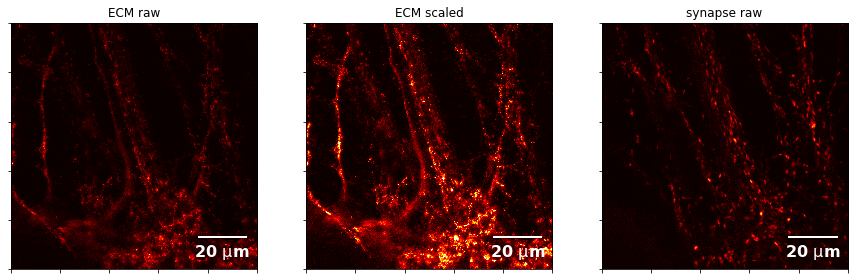

In [4]:
randomno=np.random.randint(1,len(results["filename"]))
ecm_channel_no=results["ecmchannelno"][randomno]
synapse_channel_no=results["synapsechannelno"][randomno]
#autofluorescence_channel_no=results["autofluorescencechannelno"][randomno]

ecm_image_name=results["filename"][randomno]+" Ch"+str(ecm_channel_no)+" {0}.tif"
synapse_image_name=results["filename"][randomno]+" Ch"+str(synapse_channel_no)+" {0}.tif"
#autofluorescence_image_name=results["filename"][randomno]+" Ch"+str(autofluorescence_channel_no)+" {0}.tif"

print("Image name:",results["filename"][randomno].split('/')[-1])
print("Experimental condition:",results["exp condition"][randomno])
ecm_image=pims.open(ecm_image_name)[0]
synapse_image=pims.open(synapse_image_name)[0]
#autofluorescence_image=pims.open(autofluorescence_image_name)[0]


   
figure=plt.figure(figsize=(15,15))
figure.add_subplot(131)
plt.imshow(ecm_image,interpolation='none',cmap='hot')
plt.title('ECM raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
figure.add_subplot(132)
plt.imshow(ecm_image,interpolation='none',cmap='hot',vmin=3*np.min(ecm_image),vmax=0.4*np.max(ecm_image))
plt.title('ECM scaled')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

figure.add_subplot(133)
plt.imshow(synapse_image,interpolation='none',cmap='hot')
plt.title('synapse raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

## Find spots

### Manual

In [5]:
#make empty masks
for i in range(0,len(results["filename"])):
    results["Manual vglut spots mask"].append(np.nan)

### For vglut channel

In [16]:
import ipywidgets as widgets
from ipywidgets import interact
first=0

#load first image
synapse_channel_no=results["synapsechannelno"][first]
synapse_image_name=results["filename"][first]+" Ch"+str(synapse_channel_no)+" {0}.tif"


synapse_image=pims.open(synapse_image_name)[0]
synapse_spots=deepcopy(synapse_image)
synapse_spots=ndi.median_filter(synapse_spots,size=5)

lower_man_threshold=np.min(synapse_spots)
upper_man_threshold=np.max(synapse_spots)

def f(Threshold,Manual_Threshold,Open,Close,Image_no):
    
    ii=Image_no
    synapse_channel_no=results["synapsechannelno"][ii]
    synapse_image_name=results["filename"][ii]+" Ch"+str(synapse_channel_no)+" {0}.tif"

    synapse_image=pims.open(synapse_image_name)[0]
    #bandpass (subtract gaussian filter)
    #lowpass = ndi.gaussian_filter(synapse_image, 3)
    #synapse_image = synapse_image - lowpass
    #synapse_image[synapse_image<0]=0
    
    synapse_spots=deepcopy(synapse_image)
    lower_man_threshold=np.min(synapse_spots)
    upper_man_threshold=np.max(synapse_spots)

    if Threshold=="Li":
        synapse_image_threshold=threshold_li(synapse_image)      
    if Threshold=="Otsu":
        synapse_image_threshold=threshold_otsu(synapse_image)
    if Threshold=="Manual":
        synapse_image_threshold=Manual_Threshold
    
    synapse_spots[synapse_spots<synapse_image_threshold]=0
    synapse_spots=ndi.binary_opening(synapse_spots,iterations=Open)
    synapse_spots=ndi.binary_closing(synapse_spots,iterations=Close)
    results["Manual vglut spots mask"][ii]=synapse_spots
    fig=plt.figure(figsize=(10,10))
    fig.add_subplot(121)
    plt.imshow(synapse_spots)
    plt.imshow(synapse_image,alpha=0.5,cmap='inferno')
    fig.add_subplot(122)
    plt.imshow(synapse_image,cmap='inferno')
    

#widgets
Threshold=widgets.Dropdown(options=["Li","Otsu","Manual"])
Manual_Threshold=widgets.IntSlider(min=lower_man_threshold,max=upper_man_threshold,step=1,value=lower_man_threshold)
Open=widgets.IntText(min=0,max=20,step=1,value=1)
Close=widgets.IntText(min=0,max=20,step=1,value=1)
Image_no=widgets.IntText(min=0,max=len(results["filename"]),value=0)

w=interact(f,Threshold=Threshold,Manual_Threshold=Manual_Threshold,Open=Open,Close=Close,
           Image_no=Image_no)

interactive(children=(Dropdown(description='Threshold', options=('Li', 'Otsu', 'Manual'), value='Li'), IntSlid…

In [6]:
for i in range(0,len(results["filename"])):
    print(results["filename"][i])
    synapse_channel_no=results["synapsechannelno"][i]
    synapse_image_name=results["filename"][i]+" Ch"+str(synapse_channel_no)+" {0}.tif"
    synapse_image=pims.open(synapse_image_name)[0]
    synapse_spots=deepcopy(synapse_image)
    synapse_spots=ndi.median_filter(synapse_spots,size=5)
    synapse_image_threshold=threshold_otsu(synapse_image)
    synapse_spots[synapse_spots<synapse_image_threshold]=0
    synapse_spots=ndi.binary_opening(synapse_spots,iterations=10)
    synapse_spots=ndi.binary_closing(synapse_spots,iterations=7)
    results["Manual vglut spots mask"][i]=synapse_spots
    #label images
    spots_mask=results["Manual vglut spots mask"][i]
    spots_labeled, cc_num=ndi.label(spots_mask)
    #cut out ecm image 4microns around each spot - 200pixels
    print(cc_num)

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/04_cell5_dendrites_01_ExpControl
17
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/03_cell1_axons_01_ExpControl
91
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/03_cell1_dendrites_01_ExpControl
132
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/03_cell2_axonanddendrites_01_ExpControl
66
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12

2
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/06_cell3_dendrites_02_ExpControl
2
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/06_cell4_axon_01_ExpControl
85
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/06_cell4_dendrites_01_ExpControl
83
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/02_cell4_dendrites_02_ExpControl
1
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unbloc

### Backup manual spots for vglut

In [7]:
for image in range(0,len(results["filename"])):
    np.save(results["filename"][image]+'_vglut_spots_mask.npy',results["Manual vglut spots mask"][image])